In [2]:
import pandas as pd
import snscrape.modules.twitter as sn
import neattext
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from transformers import pipeline
from neattext.pipeline import TextPipeline
import neattext.functions as nfx
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

c:\Users\BIOLA\Desktop\Data Science Projects\Learnings\Twitter Analysis\twitter_env3.8\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


### Data Mining

In [103]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = '((#SayNoToRape)) lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

Say_no_to_rape = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [3]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'rape culture lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

rape_culture2 = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [4]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = '(rape_culture) (#rape_culture) lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

df = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [5]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'call to action rape lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

call_to_action = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [6]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'Self Defense Suggestion rape lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

self_defence = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [7]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'Victim Blaming rape lang:en lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

victim_blaming = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [8]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'Rape Penalty lang:en lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

rape_penalty = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [21]:
rape_culture2_ = rape_culture2.copy()
rape_penalty_ = rape_penalty.copy()
victim_blaming_ = victim_blaming.copy()
self_defence_ = self_defence.copy()
call_to_action_ = call_to_action.copy()
Say_no_to_rape_ = Say_no_to_rape.copy()

---------------------------------------------------------
### Data Cleaning

In [22]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
rape_culture2_['clean_tweet'] = rape_culture2_['Tweets'].apply(cleaner)
rape_culture2_['clean_tweet'] = rape_culture2_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
rape_culture2_['clean_tweet'] = rape_culture2_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
rape_culture2_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
rape_culture2_.reset_index(drop = True)
rape_culture2_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
rape_culture2_.Date = rape_culture2_.Date.str[:9] # Select the first 9 letters of the strings
rape_culture2_.set_index('Date', inplace= True)
rape_culture2_['DisplayName'] = rape_culture2_['DisplayName'].apply(nfx.remove_emojis)
rape_culture2_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

rape_culture2_.shape

(3929, 2)

In [23]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
rape_penalty_['clean_tweet'] = rape_penalty_['Tweets'].apply(cleaner)
rape_penalty_['clean_tweet'] = rape_penalty_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
rape_penalty_['clean_tweet'] = rape_penalty_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
rape_penalty_['clean_tweet'] = rape_penalty_['clean_tweet'].apply(nfx.remove_emojis)
rape_penalty_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
rape_penalty_.reset_index(drop = True)
rape_penalty_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
rape_penalty_.Date = rape_penalty_.Date.str[:9] # Select the first 9 letters of the strings
rape_penalty_.set_index('Date', inplace= True)
rape_penalty_['DisplayName'] = rape_penalty_['DisplayName'].apply(nfx.remove_emojis)
rape_penalty_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

rape_penalty_

,DisplayName,clean_tweet
Date,,
2022-07-2,jude 🦴hell detective (DOLL),cw: sa the thing about sexual violence in fant...
2022-07-2,Rachel (is Awake) Horton,Let’s try to stop the euphemisms for truly hor...
2022-07-2,Gina Lee she/her DMs,Pedophilia &amp; rape/incest are HEAVY sins....
2022-07-2,OnyekaChi,"Yes, and the girl will also ..."
2022-07-2,angela55,It's also annoying when you can't file...
...,...,...
2022-07-2,I LOVE MILFS,Men who rape women are charged with “att...
2022-07-2,wardy,"18 years ffs, rape of a child should be the ..."
2022-07-2,Cold Dead Fingers,I support the Death Penalty for child rape.


In [24]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
victim_blaming_['clean_tweet'] = victim_blaming_['Tweets'].apply(cleaner)
victim_blaming_['clean_tweet'] = victim_blaming_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
victim_blaming_['clean_tweet'] = victim_blaming_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
victim_blaming_['clean_tweet'] = victim_blaming_['clean_tweet'].apply(nfx.remove_emojis)
victim_blaming_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
victim_blaming_.reset_index(drop = True)
victim_blaming_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
victim_blaming_.Date = victim_blaming_.Date.str[:9] # Select the first 9 letters of the strings
victim_blaming_.set_index('Date', inplace= True)
victim_blaming_['DisplayName'] = victim_blaming_['DisplayName'].apply(nfx.remove_emojis)
victim_blaming_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

victim_blaming_

,DisplayName,clean_tweet
Date,,
2022-07-2,Krunken Duncan,Saved a potential rape victim and stop a...
2022-07-2,Jay Robertson,"The GOP's ""blame the Capitol Police"" tactics..."
2022-07-2,Thando Ndlovu,That doesn't work in Zim!! This is crazy vic...
2022-07-2,lawrence,That's like blaming the rape victim for no...
2022-07-2,DreamZim,Its sad when it's coming from a person w...
...,...,...
2022-07-2,Bex J,"Quite, question should be how tf did no-one ..."
2022-07-2,King James,They should be apologizing to you for ...
2022-07-2,infinitelinesof7,Rape culture/ victim blaming


In [25]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
self_defence_['clean_tweet'] = self_defence_['Tweets'].apply(cleaner)
self_defence_['clean_tweet'] = self_defence_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
self_defence_['clean_tweet'] = self_defence_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
self_defence_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
self_defence_.reset_index(drop = True)
self_defence_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
self_defence_.Date = self_defence_.Date.str[:9] # Select the first 9 letters of the strings
self_defence_.set_index('Date', inplace= True)
self_defence_['DisplayName'] = self_defence_['DisplayName'].apply(nfx.remove_emojis)
self_defence_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

self_defence_.shape

(62, 2)

In [26]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
call_to_action_['clean_tweet'] = call_to_action_['Tweets'].apply(cleaner)
call_to_action_['clean_tweet'] = call_to_action_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
call_to_action_['clean_tweet'] = call_to_action_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
call_to_action_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
call_to_action_.reset_index(drop = True)
call_to_action_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
call_to_action_.Date = call_to_action_.Date.str[:9] # Select the first 9 letters of the strings
call_to_action_.set_index('Date', inplace= True)
call_to_action_['DisplayName'] = call_to_action_['DisplayName'].apply(nfx.remove_emojis)
call_to_action_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

call_to_action_.shape

(1089, 2)

In [105]:

import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
Say_no_to_rape_['clean_tweet'] = Say_no_to_rape_['Tweets'].apply(cleaner)
Say_no_to_rape_['clean_tweet'] = Say_no_to_rape_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
Say_no_to_rape_['clean_tweet'] = Say_no_to_rape_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
Say_no_to_rape_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
Say_no_to_rape_.reset_index(drop = True)
Say_no_to_rape_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
Say_no_to_rape_.Date = Say_no_to_rape_.Date.str[:9] # Select the first 9 letters of the strings
Say_no_to_rape_.set_index('Date', inplace= True)
Say_no_to_rape_['DisplayName'] = Say_no_to_rape_['DisplayName'].apply(nfx.remove_emojis)
Say_no_to_rape_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

Say_no_to_rape_.shape

(3811, 2)

-------------------------------------------------------------------------
### Building Sentiment

In [27]:
from textblob import TextBlob
# def Get_Sentiment(text):
#     blob = TextBlob(text)
#     polarity = blob.sentiment.polarity
#     subjectivity = blob.sentiment.subjectivity
#     if polarity >0:
#         label = 'Positive'
#     elif polarity <0:
#         label = 'Negative'
#     else:
#         label = 'Neutral'
#     result = {'Polarity': polarity, 'Subjectivity': subjectivity, 'Sentiment': label}
#     return result


    # Create Sentiment Function
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity


# Create a function to store the sentiment output
def sentiment_score(score):
    if score <0:
        return 'Negetive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [28]:
# Create columns for each subject and each dataframes
rape_culture2_['Subjectivity'] = rape_culture2_['clean_tweet'].apply(get_subjectivity)
rape_culture2_['Polarity'] = rape_culture2_['clean_tweet'].apply(get_polarity)

rape_penalty_['Subjectivity'] = rape_penalty_['clean_tweet'].apply(get_subjectivity)
rape_penalty_['Polarity'] = rape_penalty_['clean_tweet'].apply(get_polarity)

victim_blaming_['Subjectivity'] = victim_blaming_['clean_tweet'].apply(get_subjectivity)
victim_blaming_['Polarity'] = victim_blaming_['clean_tweet'].apply(get_polarity)

self_defence_['Subjectivity'] = self_defence_['clean_tweet'].apply(get_subjectivity)
self_defence_['Polarity'] = self_defence_['clean_tweet'].apply(get_polarity)

call_to_action_['Subjectivity'] = call_to_action_['clean_tweet'].apply(get_subjectivity)
call_to_action_['Polarity'] = call_to_action_['clean_tweet'].apply(get_polarity)


Say_no_to_rape_['Subjectivity'] = Say_no_to_rape_['clean_tweet'].apply(get_subjectivity)
Say_no_to_rape_['Polarity'] = Say_no_to_rape_['clean_tweet'].apply(get_polarity)

In [54]:
# Getting the sentiment degree cannot work on a duplicated index. We reset index 
rape_culture2_.reset_index(inplace= True)
rape_penalty_.reset_index(inplace= True)
victim_blaming_.reset_index(inplace= True)
self_defence_.reset_index(inplace= True)
call_to_action_.reset_index(inplace= True)
Say_no_to_rape_.reset_index(inplace= True)

In [55]:
# Create a column to store the sentiment degree in all data frames
rape_culture2_['Sentiments'] = rape_culture2_['Polarity'].apply(sentiment_score)
rape_penalty_['Sentiments'] = rape_culture2_['Polarity'].apply(sentiment_score)
victim_blaming_['Sentiments'] = rape_culture2_['Polarity'].apply(sentiment_score)
self_defence_['Sentiments'] = rape_culture2_['Polarity'].apply(sentiment_score)
call_to_action_['Sentiments'] = rape_culture2_['Polarity'].apply(sentiment_score)
Say_no_to_rape_['Sentiments'] = rape_culture2_['Polarity'].apply(sentiment_score)

In [61]:
# Save datasets to CSV
rape_culture2_.to_csv('Rape Culture.csv')
rape_penalty_.to_csv('Rape Penalty.csv')
victim_blaming_.to_csv('Victim Blaming.csv')
self_defence_.to_csv('Self Defence.csv')
call_to_action_.to_csv('Call to Action.csv')
Say_no_to_rape_.to_csv('Say No To Rape.csv')

-------------------------------------------------------
### Text Classification Modelling

In [393]:
# prepare the dataset to be used for text analysis modelling
rape_culture2_['Target'] = 'Rape Culture'
rape_penalty_['Target'] = 'Rape penalty'
victim_blaming_['Target'] = 'Victim Blaming'
self_defence_['Target'] = 'Self Defence'
call_to_action_['Target'] = 'Call to Action'

# join the dataframes together
data_list = [rape_penalty_, rape_culture2_, victim_blaming_, self_defence_, call_to_action_]
data = pd.concat(data_list)
data.shape

(12845, 7)

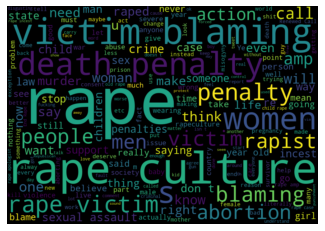

In [424]:
# Display most common words in the dataframe
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

words = ' '.join( [tweet for tweet in data['clean_tweet']])
wordcloud = WordCloud(width = 1000, height = 700).generate(words)
plt.imshow(wordcloud, interpolation  = 'bilinear')
plt.axis('off')
plt.show()

In [394]:
data

,Date,DisplayName,clean_tweet,Subjectivity,Polarity,Sentiments,Target
0,2022-07-2,jude 🦴hell detective (DOLL),cw: sa the thing about sexual violence in fant...,0.777778,0.416667,Positive,Rape penalty
1,2022-07-2,Rachel (is Awake) Horton,Let’s try to stop the euphemisms for truly hor...,0.700000,-0.500000,Positive,Rape penalty
2,2022-07-2,Gina Lee she/her DMs,Pedophilia &amp; rape/incest are HEAVY sins....,0.765306,-0.302041,Positive,Rape penalty
3,2022-07-2,OnyekaChi,"Yes, and the girl will also ...",0.300000,0.200000,Positive,Rape penalty
4,2022-07-2,angela55,It's also annoying when you can't file...,0.500000,-0.166667,Negetive,Rape penalty
...,...,...,...,...,...,...,...
1084,2022-07-2,Shoaib Taimur,"RT Call to Action: Kidnapping, torture, murd...",0.100000,0.100000,Neutral,Call to Action
1085,2022-07-2,sexgenderbody,New post by arvan at | Call to Action: Kidnap...,0.277273,0.118182,Neutral,Call to Action
1086,2022-07-2,CSTS - Serenity,Good news: Victory in Zambian civil case of sc...,0.566667,0.016667,Positive,Call to Action
1087,2022-07-2,WBAL-TV 11 Baltimore,NAACP Joins Rape Investigation Effort: There i...,0.466667,0.300000,Neutral,Call to Action


In [395]:
# Drop unwanted columns and turn all value to lowercase for easy NLP

dx = data.drop(['Subjectivity', 'Polarity', 'Sentiments'],axis = 1)
dx['clean_tweet'] = dx['clean_tweet'].apply(str) # Convert all to string
dx['clean_tweet'] = dx['clean_tweet'].str.lower()

dx['Target'] = dx['Target'].apply(str) # Convert all to string
dx['Target'] = dx['Target'].str.lower()
dx

,Date,DisplayName,clean_tweet,Target
0,2022-07-2,jude 🦴hell detective (DOLL),cw: sa the thing about sexual violence in fant...,rape penalty
1,2022-07-2,Rachel (is Awake) Horton,let’s try to stop the euphemisms for truly hor...,rape penalty
2,2022-07-2,Gina Lee she/her DMs,pedophilia &amp; rape/incest are heavy sins....,rape penalty
3,2022-07-2,OnyekaChi,"yes, and the girl will also ...",rape penalty
4,2022-07-2,angela55,it's also annoying when you can't file...,rape penalty
...,...,...,...,...
1084,2022-07-2,Shoaib Taimur,"rt call to action: kidnapping, torture, murd...",call to action
1085,2022-07-2,sexgenderbody,new post by arvan at | call to action: kidnap...,call to action
1086,2022-07-2,CSTS - Serenity,good news: victory in zambian civil case of sc...,call to action
1087,2022-07-2,WBAL-TV 11 Baltimore,naacp joins rape investigation effort: there i...,call to action


In [396]:
train, test = train_test_split(dx, test_size= 0.2, random_state = 23)
print(f'train size: ', train.shape)
print(f'test size: ', test.shape)

train size:  (10276, 4)
test size:  (2569, 4)


In [397]:
# Joining all the sentences in the train dataframe together

ds = []
for row in range(0,len(train.index)):
    ds.append(' '.join(str(x) for x in train.iloc[row, 2:3]))

# Display the data
ds[1:5]

['  when a black woman was fired from uj for "racism" &amp; "sexism" you were silent. but you are out here protecting rape culture with macg. y\'all token hires have done the same damage as the apartheid regime 🤷🏿\u200d♀️',
 'nailed it   - also   to businesswomen at corporations around the world:“if your company moves to la., be prepared for 2nd class citizenship. you’ll lose control over your body, health care, and live in a rape culture. we’re 100% regressive &amp; proud of it!” ',
 '      1 out of 14-17 males bred in the ancient times. which makes everyone baffled: how did russians, statistically savaage, yet with small stature &amp; penis length, flourish? explains their rape culture. survival of the shittiest',
 '  ronaldo missed rashfords penalty in the euros killing his confidence then benched him for elanga, he arrested greenwood for rape, injured cavani and while still at juve he somehow killed martial\'s  mojo"it\'s not a coincidence..."simple minds are attracted to simple an

In [398]:
# After preparation of our dataset, nextup we countVectorize to put them into binaries of 1s and 0s.
# This auto ascribes a particular number to a letter
# While ngram takes the letters in pairs and ascribes a number to them

# Implement Bag of Words
vector = TfidfVectorizer()
train_set = vector.fit_transform(ds) # This ascribes count to a particular letter

train_set.shape

(10276, 16985)

In [399]:
# perfrom same preprocessing step for Test data

# Join all the test dataframe together
dss = []
for row in range(0,len(test.index)):
    dss.append(' '.join(str(x) for x in test.iloc[row, 2:3]))

# Display the data
dss[1:5]

["    if all aborted babies were conceived through rape and incest then it's time for stiffer penalties on rape and incest",
 '  the baby is innocent. prosecute the man to the fullest extent of the law (i would support the death penalty for rape) and protect the innocent parties. adoption is a great option. also rape is the reason for less than 1% or abortions. in 99+/100 cases, the woman chose.',
 "        and you answer your question, i don't think there's any biological element to how violent or aggressive a person is. that's a symptom of toxic masculinity, and rape culture. our patriarchal society is the problem. there's no biological evidence for the ability to commit crime.",
 'is there a  argument out there that doesn’t involve gun laws, rape and incest, death penalty of murderers, or stating how religion is bad?  an actual reason why abortion should be legal in cases that don’t involve rape/incest, or when the mothers life is in danger. 1/2']

In [400]:
# fit the count on the data
test_set = vector.transform(dss) # Fit transform on 'ds' version of test data  - dss
test_set.shape


(2569, 16985)

In [401]:
# Train using the RandomForest and the MultinomialNB models respectively

rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(train_set, train['Target'])


nv =  MultinomialNB()
nv.fit(train_set, train['Target'])


MultinomialNB()

In [402]:
rf_pred = rf.predict(test_set)
nv_pred = nv.predict(test_set)

In [403]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


classify = classification_report(test['Target'], rf_pred )
print(classify)
score = accuracy_score(test['Target'], rf_pred )
print(f'accuracy score: ',score)

                precision    recall  f1-score   support

call to action       1.00      0.99      0.99       221
  rape culture       0.98      0.98      0.98       747
  rape penalty       1.00      0.99      0.99       801
  self defence       1.00      0.64      0.78        11
victim blaming       0.98      0.99      0.98       789

      accuracy                           0.98      2569
     macro avg       0.99      0.92      0.94      2569
  weighted avg       0.98      0.98      0.98      2569

accuracy score:  0.9844297391981316


----------------------------------------------
### Model Testing

In [415]:
data.iloc[2000:2002, 2].values

array(['  We need to make the penalties for rape much higher. The death penalty would be fine with me, but, castration might even be better.',
       '  Bro zubair delted fb id for numerous insulting religion  but u are silent watching  rape threat death penalty for quoting Islamic text  now u also want freedom to insult Hinduism  than u cry why bjp is winning  do u think public  are idiot  ya u are only know how to manpulted ?'],
      dtype=object)

In [418]:
# Testing model 
word = data.iloc[2000:2001, 2].values
count_word = vector.transform(word)
preds = nv.predict(count_word)
preds

array(['rape penalty'], dtype='<U14')

In [422]:
data.iloc[1084:1085, 2].values

array(['  The penalty for rape should be death, public execution preferably. Give a year in jail to attempt to prove their innocence, then day 366 after conviction they are put to death by the state.'],
      dtype=object)

In [420]:
word = data.iloc[1084:1085, 2].values
count_word = vector.transform(word)
preds = nv.predict(count_word)
preds

array(['rape penalty'], dtype='<U14')